In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/sei.csv')
dataset

,index,id_inscricao,dt_inscricao,dt_fim_inscricao,sg_uf,tp_sexo,dt_nascimento,sg_pais,id_oferta_x,id_curso,...,data_entrega_atividade_15,nota_maxima_atividade_16,nota_aluno_atividade_16,data_entrega_atividade_16,nota_maxima_atividade_17,nota_aluno_atividade_17,data_entrega_atividade_17,nota_maxima_atividade_18,nota_aluno_atividade_18,data_entrega_atividade_18
0,0,92,2018-02-19 00:00:00,2018-03-12 07:42:00,MG,F,1958-07-28,NaN,26,74,...,2018-03-02 08:30:38,100.0,88.89,2018-03-05 07:40:28,100.0,100.00,2018-03-06 07:42:09,100.0,100.0,07/03/2018 07:18:59
1,1,94,2018-02-19 00:00:00,2018-03-12 07:59:00,RJ,M,1973-06-15,NaN,26,74,...,NaN,100.0,NaN,NaN,100.0,NaN,NaN,100.0,NaN,NaN
2,2,97,2018-02-19 00:00:00,2018-03-12 08:44:00,MG,F,1949-06-19,NaN,26,74,...,2018-03-03 19:35:08,100.0,100.00,2018-03-04 08:13:14,100.0,100.00,2018-03-04 08:36:16,100.0,100.0,04/03/2018 09:10:30
3,3,106,2018-02-19 00:00:00,2018-03-12 09:45:00,DF,M,1984-10-07,NaN,26,74,...,2018-02-21 10:31:29,100.0,77.78,2018-02-22 18:35:25,100.0,100.00,2018-02-22 18:45:12,100.0,100.0,22/02/2018 18:55:09
4,4,109,2018-02-19 00:00:00,2018-03-12 10:08:00,TO,F,1978-04-13,NaN,26,74,...,2018-02-24 15:10:40,100.0,77.78,2018-02-24 16:18:17,100.0,85.71,2018-02-24 16:43:16,100.0,100.0,24/02/2018 16:59:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79609,79609,553927,2019-02-27 22:39:00,2019-03-29 23:59:00,MG,F,1978-12-22,BR,852,74,...,2019-02-28 00:54:55,100.0,77.78,2019-02-28 00:59:27,100.0,100.00,2019-02-28 01:03:31,100.0,100.0,28/02/2019 01:07:05
79610,79610,553937,2019-02-27 22:37:00,2019-03-29 23:59:00,RN,F,1967-05-20,BR,852,74,...,NaN,100.0,NaN,NaN,100.0,NaN,NaN,100.0,NaN,NaN
79611,79611,553995,2019-02-27 23:57:00,2019-03-29 23:59:00,AL,M,1981-08-02,BR,852,74,...,NaN,100.0,NaN,NaN,100.0,NaN,NaN,100.0,NaN,NaN
79612,79612,554003,2019-02-27 23:57:00,2019-03-29 23:59:00,PE,M,1983-11-20,BR,852,74,...,NaN,100.0,NaN,NaN,100.0,NaN,NaN,100.0,NaN,NaN


## Primeiro obtemos algumas informações sobre o dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79614 entries, 0 to 79613
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         79614 non-null  int64  
 1   id_inscricao                  79614 non-null  int64  
 2   dt_inscricao                  79614 non-null  object 
 3   dt_fim_inscricao              79614 non-null  object 
 4   sg_uf                         79107 non-null  object 
 5   tp_sexo                       79614 non-null  object 
 6   dt_nascimento                 79614 non-null  object 
 7   sg_pais                       67871 non-null  object 
 8   id_oferta_x                   79614 non-null  int64  
 9   id_curso                      79614 non-null  int64  
 10  qt_carga_horaria_oferta       79614 non-null  int64  
 11  qt_duracao_dias               79614 non-null  int64  
 12  tx_nome_orgao                 35328 non-null  object 
 13  s

In [4]:
resultados_str = dataset["sit_matricula"].unique()
resultados_str

# Onde APROVADO & CERTIFICADO representam de certa forma a mesma situação,
# CANC_DESISTENTE é o aluno que voluntariamente trancou/desistiu -> alterar para TRANCAMENTO

# REPROVADO => se média < 60 pontos
# DESISTENTE é o aluno que fez ao menos 1 atividade e não continuou o curso (menos que 18 atividades, 
# desde que não tenha atingido 60 pontos).

# Para ser aprovado o aluno deve fazer no mínimo 60 pontos, mesmo que não faça todas as atividades.

array(['APROVADO', 'ABANDONO', 'CERTIFICADO', 'CANC_DESISTENTE',
       'REPROVADO', 'DESISTENTE'], dtype=object)

In [5]:
dataset.describe()

,index,id_inscricao,id_oferta_x,id_curso,qt_carga_horaria_oferta,qt_duracao_dias,id_pessoa,nota_maxima_curso,nota_final_aluno_curso,nota_maxima_atividade_1,...,nota_maxima_atividade_14,nota_aluno_atividade_14,nota_maxima_atividade_15,nota_aluno_atividade_15,nota_maxima_atividade_16,nota_aluno_atividade_16,nota_maxima_atividade_17,nota_aluno_atividade_17,nota_maxima_atividade_18,nota_aluno_atividade_18
count,79614.000000,79614.000000,79614.000000,79614.0,79614.0,79614.0,79614.000000,79614.0,52523.000000,79614.0,...,79614.0,50145.000000,79614.0,49775.000000,79614.0,49138.000000,79614.0,48733.000000,79614.0,48473.000000
mean,39806.500000,265527.783932,396.835758,74.0,20.0,30.0,510838.415002,100.0,90.606173,100.0,...,100.0,90.041081,100.0,89.878803,100.0,93.424988,100.0,97.922097,100.0,96.846394
std,22982.726503,158926.186240,217.601694,0.0,0.0,0.0,144123.830335,0.0,12.205744,0.0,...,0.0,14.331740,0.0,14.524414,0.0,11.356262,0.0,8.130214,0.0,8.684660
min,0.000000,92.000000,26.000000,74.0,20.0,30.0,4.000000,100.0,0.000000,100.0,...,100.0,0.000000,100.0,0.000000,100.0,0.000000,100.0,0.000000,100.0,0.000000
25%,19903.250000,111219.500000,252.000000,74.0,20.0,30.0,464976.500000,100.0,88.186080,100.0,...,100.0,90.000000,100.0,83.330000,100.0,88.890000,100.0,100.000000,100.0,100.000000
50%,39806.500000,288559.000000,411.000000,74.0,20.0,30.0,551845.500000,100.0,93.780000,100.0,...,100.0,90.000000,100.0,100.000000,100.0,100.000000,100.0,100.000000,100.0,100.000000
75%,59709.750000,385949.250000,504.000000,74.0,20.0,30.0,602087.750000,100.0,97.871340,100.0,...,100.0,100.000000,100.0,100.000000,100.0,100.000000,100.0,100.000000,100.0,100.000000
max,79613.000000,554006.000000,852.000000,74.0,20.0,30.0,710565.000000,100.0,100.000000,100.0,...,100.0,100.000000,100.0,100.000000,100.0,100.000000,100.0,100.000000,100.0,100.000000


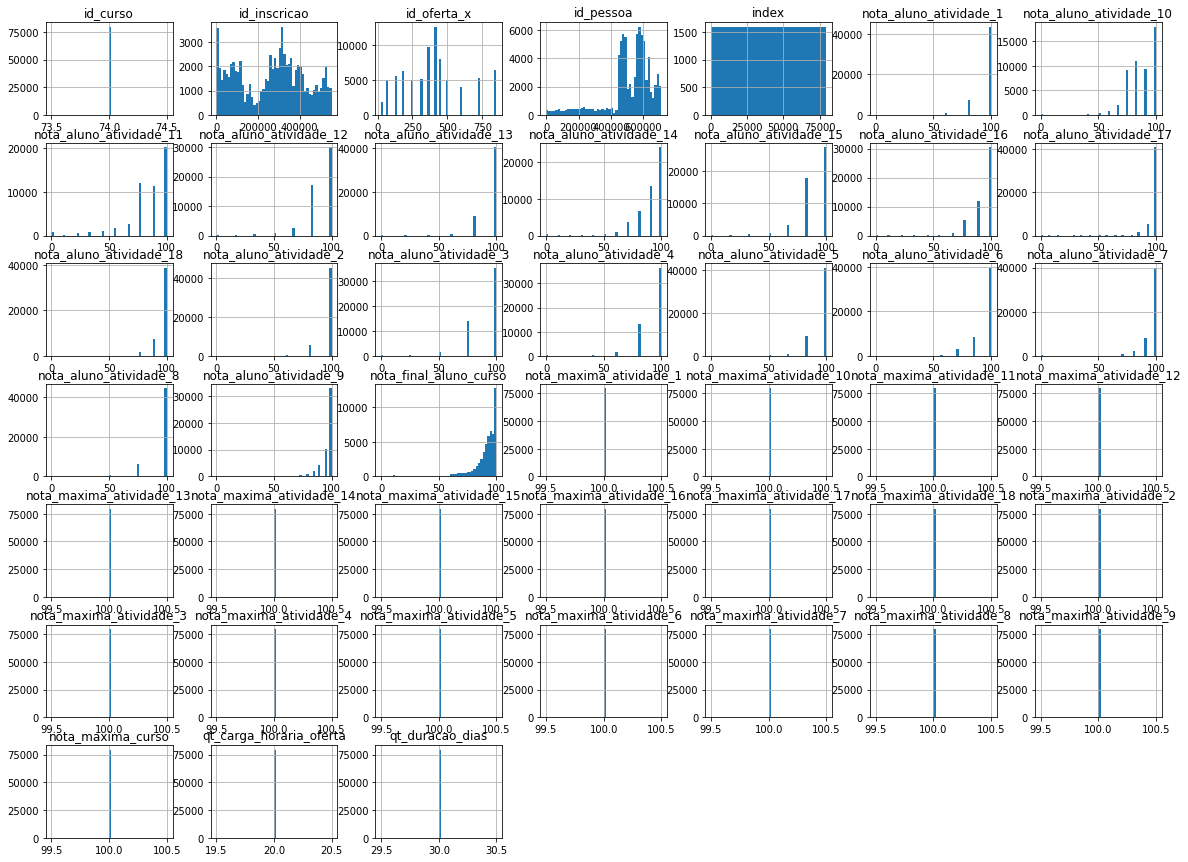

In [6]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

### Notas máximas das atividades

In [7]:
# As colunas de nota máxima possuem um único valor, o que pode atrapalhar os algoritmos de ML
nota_maxima_atividade_1 = dataset["nota_maxima_atividade_1"].unique()
print("nota_maxima_atividade_1: ", nota_maxima_atividade_1)

nota_maxima_atividade_15 = dataset["nota_maxima_atividade_15"].unique()
print("nota_maxima_atividade_15: ", nota_maxima_atividade_15)



nota_maxima_atividade_1:  [100.]
nota_maxima_atividade_15:  [100.]


In [8]:
notas_maximas = dataset.filter(like='nota_maxima_atividade',axis=1)
notas_maximas.tail()

,nota_maxima_atividade_1,nota_maxima_atividade_2,nota_maxima_atividade_3,nota_maxima_atividade_4,nota_maxima_atividade_5,nota_maxima_atividade_6,nota_maxima_atividade_7,nota_maxima_atividade_8,nota_maxima_atividade_9,nota_maxima_atividade_10,nota_maxima_atividade_11,nota_maxima_atividade_12,nota_maxima_atividade_13,nota_maxima_atividade_14,nota_maxima_atividade_15,nota_maxima_atividade_16,nota_maxima_atividade_17,nota_maxima_atividade_18
79609,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
79610,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
79611,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
79612,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
79613,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


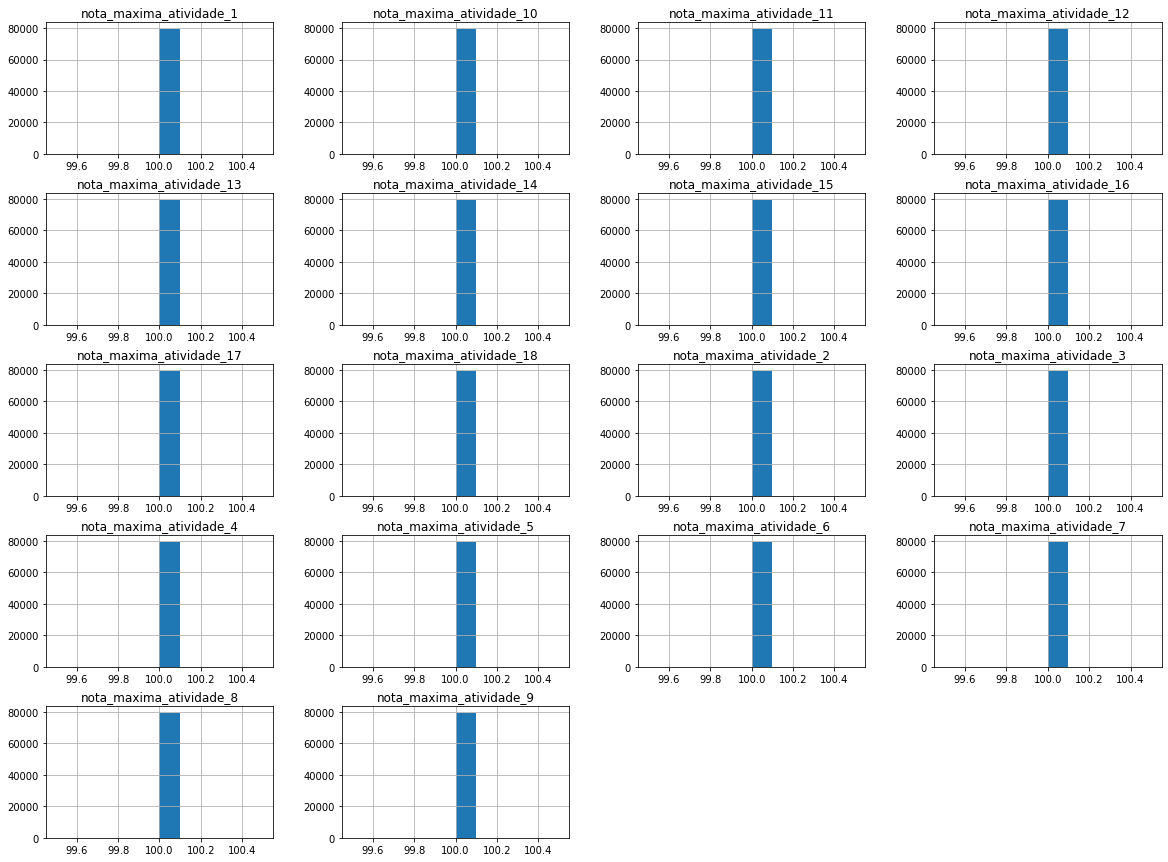

In [9]:
"""
Como podemos ver, esses dados são bastante repetitivos e podem atrapalhar os algoritmos de aprendizagem.
Por isso iremos removê-los num primeiro momento. 
"""

notas_maximas.hist(bins=10, figsize=(20,15))
plt.show()

## Notas dos alunos na atividade X



In [10]:
nota_aluno_atividade_1 = dataset["nota_aluno_atividade_1"].unique()
print("nota_aluno_atividade_1: ", nota_aluno_atividade_1)

nota_aluno_atividade_15 = dataset["nota_aluno_atividade_15"].unique()
print("nota_aluno_atividade_15: ", nota_aluno_atividade_15)


nota_aluno_atividade_1:  [100.  nan  80.  60.  40.   0.  10.  20.]
nota_aluno_atividade_15:  [100.      nan  83.33  66.67  33.33  50.    16.67   0.  ]


In [11]:
"""
Como podemos ver, as atividades possuem valores não numéricos (nan). Essas entradas devem ser tratadas, onde 
podemos simplesmente remover as linhas que possuem nan ou inserir a média das entradas nelas
"""
notas_atividades = dataset.filter(like='nota_aluno_atividade',axis=1)
notas_atividades.tail()

,nota_aluno_atividade_1,nota_aluno_atividade_2,nota_aluno_atividade_3,nota_aluno_atividade_4,nota_aluno_atividade_5,nota_aluno_atividade_6,nota_aluno_atividade_7,nota_aluno_atividade_8,nota_aluno_atividade_9,nota_aluno_atividade_10,nota_aluno_atividade_11,nota_aluno_atividade_12,nota_aluno_atividade_13,nota_aluno_atividade_14,nota_aluno_atividade_15,nota_aluno_atividade_16,nota_aluno_atividade_17,nota_aluno_atividade_18
79609,100.0,100.0,75.0,80.0,100.0,85.71,100.0,100.0,94.74,50.0,22.22,83.33,80.0,100.0,83.33,77.78,100.0,100.0
79610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79612,100.0,100.0,100.0,100.0,100.0,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


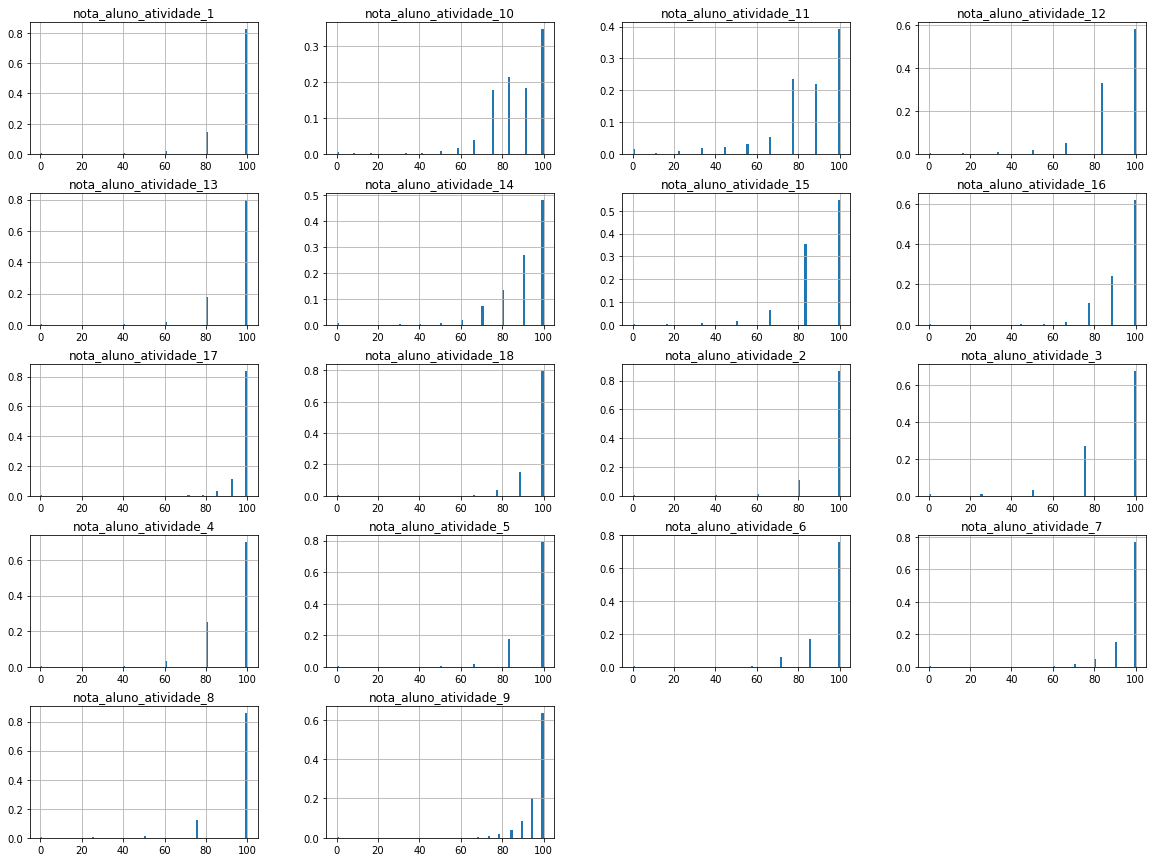

In [12]:
notas_atividades.hist(bins=100, figsize=(20,15), density=True)
plt.show()

## Distribuições

### Por resultado

In [13]:
def plot_ditribuicao(labels, dataset, sort=False, explicit_plot=True):
    f, ax = plt.subplots(figsize=(8,6))
    unique_values = sorted(labels.unique()) if sort else labels.unique()
    value = plt.bar(unique_values, dataset)
    plt.xticks([i for i in range(len(dataset))], dataset.index.tolist(), rotation='vertical', fontsize=14)
    plt.margins(y=0.15)
    plt.subplots_adjust(bottom=0.15)
    for rect in value:
            height = round(rect.get_height(), 2)
            plt.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    plt.tight_layout()
    if explicit_plot: 
        plt.show()
    
def plot_ditribuicao_ordenada(labels, dataset):
    f, ax = plt.subplots(figsize=(8,6))
    dataset_indexes = sorted(dataset.index.tolist())
    sorted_dataset = [dataset[n] for n in dataset_indexes] 
    unique_values = sorted(labels.unique())
    value = plt.bar(unique_values, sorted_dataset)
    plt.xticks(unique_values, dataset_indexes, rotation='vertical', fontsize=14)
    plt.margins(y=0.15)
    plt.subplots_adjust(bottom=0.15)
    for rect in value:
            height = round(rect.get_height(), 2)
            plt.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

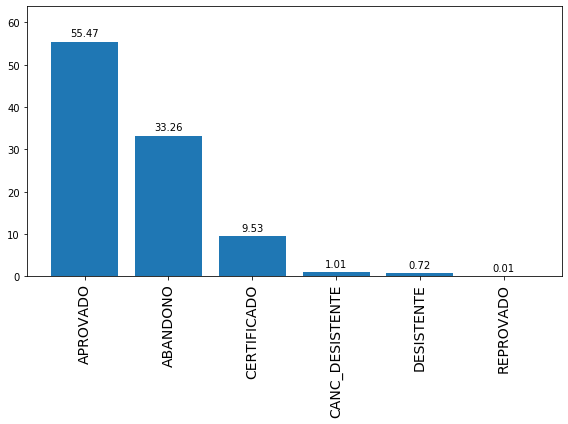

In [14]:
distribuicao_por_resultado = dataset["sit_matricula"].value_counts(normalize=True) * 100

"""
A distribuição por resultado abaixo é sem alteração alguma, ou seja, com os valores de sit_matricula
padrões. Porém conforme dito pelo professor, esses valores devem ser alterados para refletirem melhor
seus reais significados/situações. Dessa forma faremos o mesmo mas utilizando o dataset_alterado
"""
plot_ditribuicao(dataset["sit_matricula"], distribuicao_por_resultado)

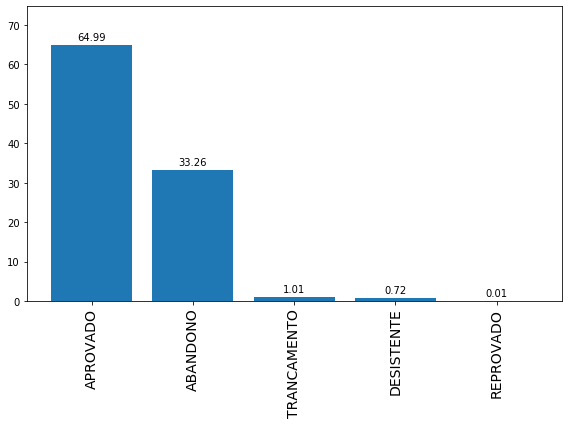

In [15]:
dataset_alterado = dataset.copy()

dataset_alterado = dataset_alterado.replace({"CERTIFICADO": "APROVADO", "CANC_DESISTENTE": "TRANCAMENTO"})

distribuicao_por_resultado = dataset_alterado["sit_matricula"].value_counts(normalize=True) * 100

"""
Agora vemos que o número de aprovados é bem superior aos demais
"""
plot_ditribuicao(dataset_alterado["sit_matricula"], distribuicao_por_resultado)


### Por tipo de poder (executivo, legislativo e judiciário)

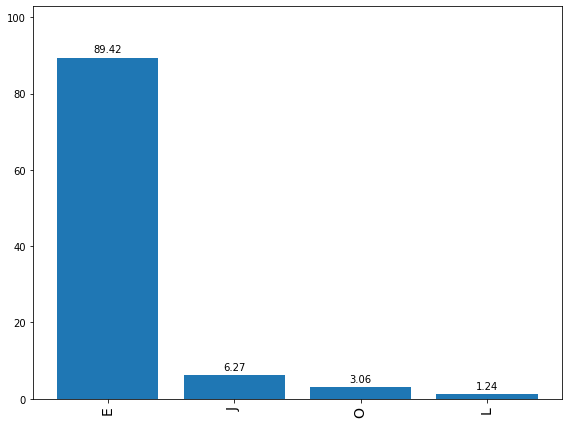

In [16]:
tp_poder = dataset["tp_poder_execut_legisl_judic"].dropna()

distribuicao_por_tipo_poder = tp_poder.value_counts(normalize=True) * 100


"""
Há uma maior quantidade de pessoas do executivo(~=89%), seguido do judiciário ( ~= 6,2%), outros (~=3%) 
e Legislativo (~= 1,2%)
"""
plot_ditribuicao(tp_poder, distribuicao_por_tipo_poder)

### Por sexo

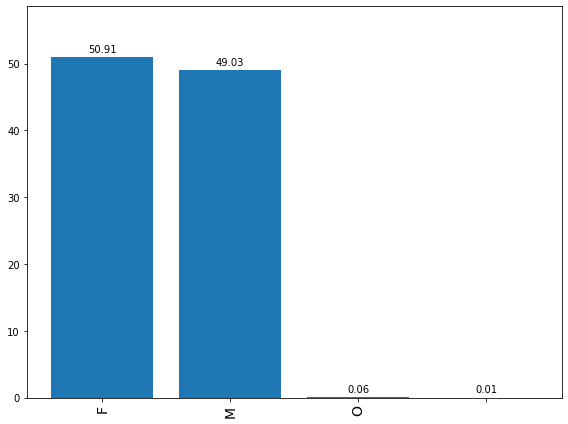

In [17]:
distribuicao_por_sexo = dataset["tp_sexo"].value_counts(normalize=True) * 100

"""
Não há uma diferença muito grande na distribuição por sexo.
"""
plot_ditribuicao(dataset["tp_sexo"], distribuicao_por_sexo)

### Por UF

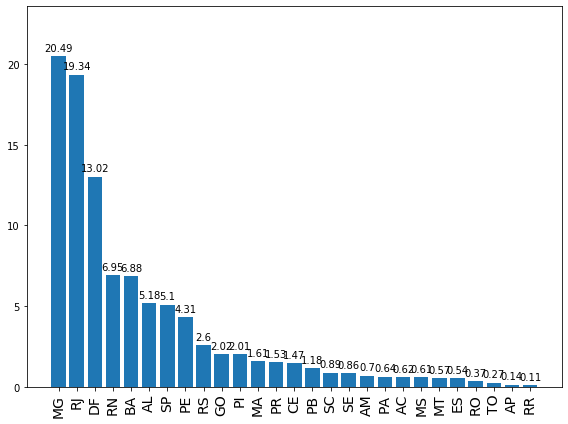

In [18]:
uf_dataset = dataset["sg_uf"].dropna()

distribuicao_por_uf = uf_dataset.value_counts(normalize=True) * 100

"""
"""
plot_ditribuicao(uf_dataset, distribuicao_por_uf)

### Por dias entre atividades

#### Entre a inscrição e a entrega da primeira atividade

O número de alunos sem data de entrega da primeira atividade é: 27206
(Ou 34.17238174190469)% 



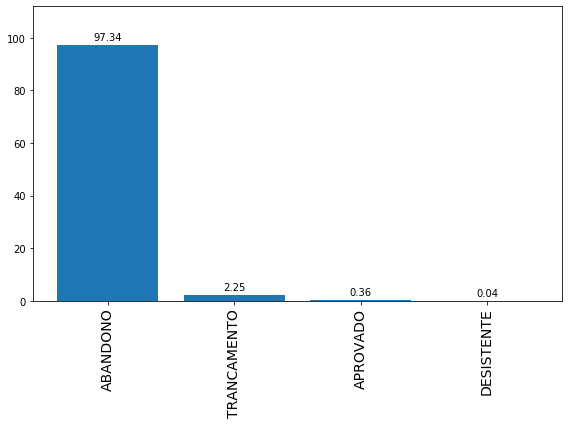

In [19]:
"""
Todas as entradas do dataset possuem uma data de inscrição, mas nem todas possuem uma data de entrega da primeira
atividade. Isso irá requerer algum tratamento, mas antes podemos ver se há alguma relação entre a ausencia de data
de entrega e o resultado:

"""
alunos_sem_data_entrega_atividade_1 = dataset_alterado[dataset_alterado['data_entrega_atividade_1'].isnull()]

print(f"O número de alunos sem data de entrega da primeira atividade é: {alunos_sem_data_entrega_atividade_1.shape[0]}")
print(f"(Ou {(alunos_sem_data_entrega_atividade_1.shape[0]/dataset.shape[0]) * 100})% \n")

distribuicao_por_situacao_atividade_1 = alunos_sem_data_entrega_atividade_1['sit_matricula'].value_counts(normalize=True) * 100

plot_ditribuicao(alunos_sem_data_entrega_atividade_1['sit_matricula'], distribuicao_por_situacao_atividade_1)

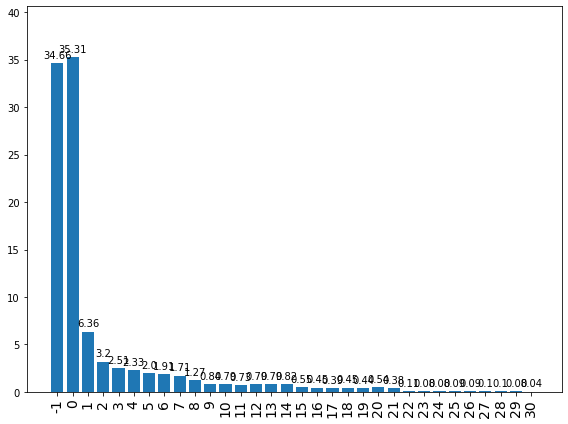

In [20]:
"""
Com isso em mente, tentaremos outra abordagem: verificar a relação entre os dias da matricula e a entrega
da primeira atividade. Para isso teremos que preencher os valores vazios de data de entrega da primeira atividade,
visto que nem todas as entradas sem valores são de fato alunos que abandonaram o curso.
"""

# Fazemos uma cópia para não alterar o dataset inicial
df_data_de_entrega_alterada = dataset_alterado.copy()

# Preenchemos todos as entradas com  '2000-01-01 00:00' no lugar de 'nan' 
df_data_de_entrega_alterada["data_entrega_atividade_1"] = \
    df_data_de_entrega_alterada["data_entrega_atividade_1"].fillna(pd.to_datetime("2000-01-01 00:00:00"))

# Convertemos os campos abaixo em date time
df_data_de_entrega_alterada[['data_entrega_atividade_1','dt_inscricao']] = \
    df_data_de_entrega_alterada[['data_entrega_atividade_1','dt_inscricao']].apply(pd.to_datetime)

# Inserimos uma nova coluna, contendo o número de dias entre a data de matricula e a data de entrega da atividade 1

df_data_de_entrega_alterada["dif_matricula_atividade_1"] = \
    (df_data_de_entrega_alterada["data_entrega_atividade_1"] - df_data_de_entrega_alterada["dt_inscricao"]).dt.days

# E setamos todos os valores < 0 (ou seja, cujo campo  `data_entrega_atividade_1` era NaN)
df_data_de_entrega_alterada["dif_matricula_atividade_1"] = df_data_de_entrega_alterada["dif_matricula_atividade_1"].clip(lower=-1)

df_data_de_entrega_alterada["dif_matricula_atividade_1"]

distribuicao_por_dif_matricula_atividade_1 = df_data_de_entrega_alterada["dif_matricula_atividade_1"].value_counts(normalize=True) * 100

plot_ditribuicao_ordenada(
    df_data_de_entrega_alterada["dif_matricula_atividade_1"], 
    distribuicao_por_dif_matricula_atividade_1
)

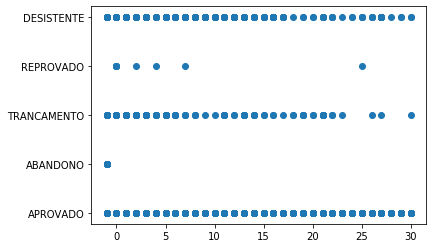

In [21]:
# E tentaremos plotar um gráfico de dias vs resultado 
plt.scatter(df_data_de_entrega_alterada["dif_matricula_atividade_1"], df_data_de_entrega_alterada["sit_matricula"])
plt.show()

In [22]:
"""
Determinar períodos de tempos e calcular quantas as atividades determinado aluno fez nesse período de tempo.
A partir disso calcular qual a probabilidade dele evadir.
(5 dias) => 6 Faixas
(7 dias) => 4 Faixas
"""

'\nDeterminar períodos de tempos e calcular quantas as atividades determinado aluno fez nesse período de tempo.\nA partir disso calcular qual a probabilidade dele evadir.\n(5 dias) => 6 Faixas\n(7 dias) => 4 Faixas\n'

# Períodos de tempo

Tentaremos então trabalhar com certos períodos de tempo e tentar prever a partir de determinados fatores, como número de atividades realizadas e/ou performance a probabilidade de um aluno evadir.

#### Melhorando o dataset

In [23]:
"""
Para isso, inicialmente iremos melhorar os dados do nosso dataset, removendo alguns atributos considerados 
desnecessários. Primeiramente removeremos os atributos referentes às notas máximas de determinada atividade,
visto que esse valor sempre será 100.
"""

"""
30/03 
Alguns dados defeituosos serão removidos para que não influenciem negativamente os testes

1101 => Aprovado, com notas nas atividades mas sem dias
165 => Fez as atividades mas algumas passaram de 1 mês
331, 382 => Data de entrega das atividades inferior ao dia de matricula 
(considerando-se dt_inscricao e não dt_fim_inscricao)
"""
dataset.drop(index=[1101, 165, 331, 382])

# Filtramos todas as colunas do dataset que possuem o valor da nota máxima da atividade X:
notas_maximas_a_remover = dataset.filter(like='nota_maxima_atividade')


# Filtramos também alguns índices e id's que não serão necessários no momento
indices_e_ids_a_remover = [
    "index", 
     "id_inscricao", 
     "id_oferta_x", 
     "id_curso", 
     "qt_carga_horaria_oferta",
     "qt_duracao_dias",
     "id_pessoa",
     "nota_maxima_curso",
     "tx_nome_orgao"
]

# E também algumas datas que podem não ser muito úteis num momento inicial
datas_a_remover = [
    "dt_fim_inscricao",
    "dt_nascimento"
]

df_filtrado = dataset.drop(
    [*indices_e_ids_a_remover, *datas_a_remover,  *list(notas_maximas_a_remover)], 
    axis=1
)

# E iremos alterar os valores do 'sit_matricula'
df_filtrado = df_filtrado.replace({"CERTIFICADO": "APROVADO", "CANC_DESISTENTE": "TRANCAMENTO"})



#### Trabalhando com as datas

In [24]:
"""
Para podemos calcular os dias temos que antes trabalhar as linhas que não possuem valores (NaN).
Poderíamos remover as linhas com esses valores, mas isso reduziria consideravelmente o tamanho do nosso dataset.
Então iremos por outra abordagem: inserir um valor padrão nessas linhas. Será inserida o datetime 
"2000-01-01 00:00"
"""

# Preenchemos todos as entradas com  '2000-01-01 00:00' no lugar de 'nan' 
def insert_default_date_time(dataset):
    datas_a_inserir = dataset.filter(like='data_entrega_atividade_')
    datas_a_inserir = datas_a_inserir.fillna(pd.to_datetime("2000-01-01 00:00:00"))
    dataset.fillna(datas_a_inserir, inplace=True)
    return dataset

# Convertemos os campos de datas em date_times:
def convert_columns_to_date_time(dataset, columns_name):
    date_time_columns = pd.to_datetime(dataset[[*columns_name]].stack(), dayfirst=True)
    date_time_columns = date_time_columns.dt.normalize()
    dataset[[*columns_name]] = date_time_columns.unstack()
    return dataset


df_filtrado = insert_default_date_time(df_filtrado)

date_columns = [*list(df_filtrado.filter(like='data_entrega_atividade_')), "dt_inscricao"]

df_filtrado = convert_columns_to_date_time(df_filtrado, date_columns)

#### Inserindo novas colunas com datas entre matricula e atividade X

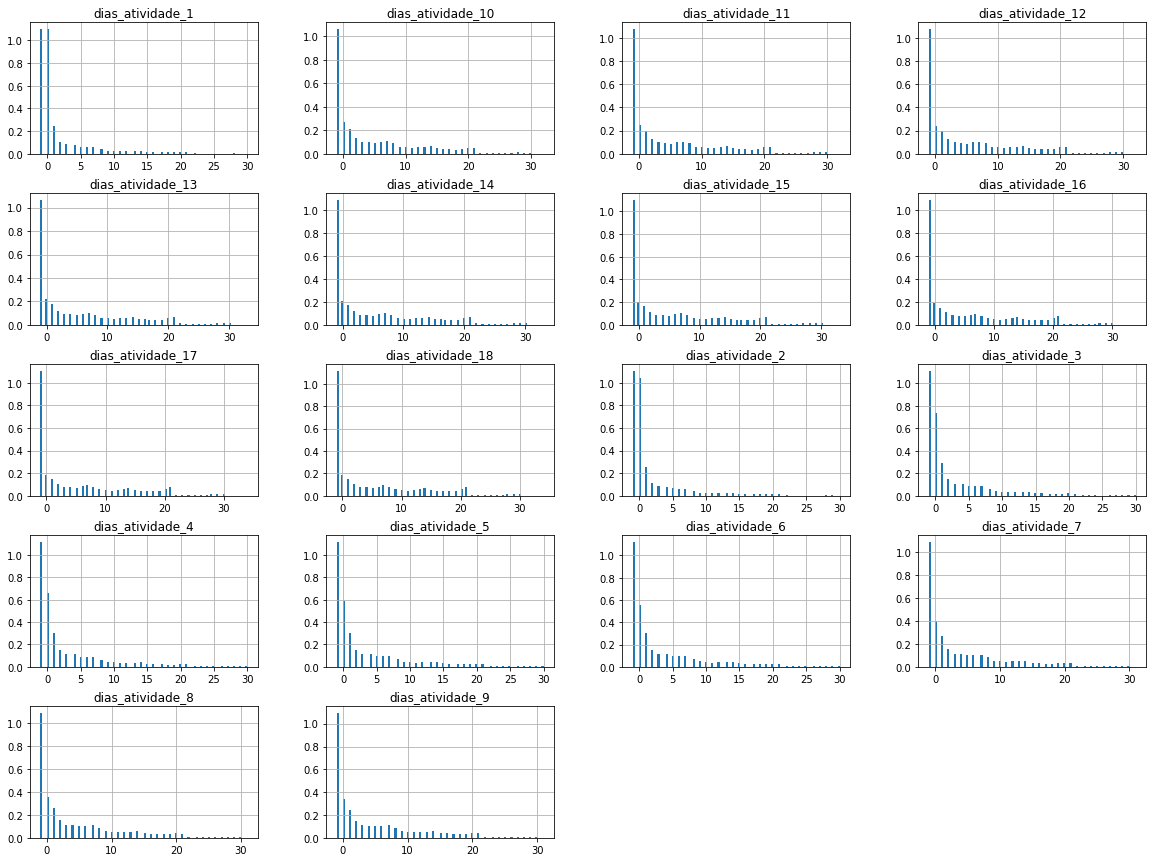

In [25]:
"""
Após preenchermos os campos de datas com valores padrões nas linhas que não tinham valor algum, enfim podemos
inserir as novas colunas que contém a contagem de dias entre a efetivação da matricula e a relização da tarefa X
"""

# Criamos uma função que irá fazer esse cálculo e retornar um dataframe com as novas colunas
def calculate_dates_between(df_initial_date, df_list_of_dates, columns_name):
    # Geramos um novo dataframe que irá comportar as diferenças entre as datas
    df_dates_between = pd.DataFrame()

    # Fazemos o calculo das diferenãs entre datas, inserindo no dataframe criado acima
    for index, item in enumerate(df_list_of_dates):
        df_dates_between[f'{columns_name}_{index+1}'] = (df_list_of_dates[item] - df_initial_date).dt.days
    
    # E setamos todos os valores < 0  = -1
    df_dates_between = df_dates_between.clip(lower=-1)

    return df_dates_between

initial_date = df_filtrado["dt_inscricao"]
list_of_dates = df_filtrado.filter(like='data_entrega_atividade_')

dif_between_dates = calculate_dates_between(
    initial_date, 
    list_of_dates, 
    columns_name='dias_atividade',
)

# Por fim, inserimos essas novas colunas no nosso df_filtrado:
df_filtrado[[*list(dif_between_dates)]] = dif_between_dates


"""
Temos as colunas com a contagem de dias entre as tarefas 1 à 18.
"""
df_filtrado[[*list(dif_between_dates)]].hist(bins=100, figsize=(20,15), density=True)
plt.show()

#### Calculando o número de atividades feitas até N dias

In [26]:
n_dias = [1,6]

In [27]:
"""
Como temos agora as colunas com os dias entre matricula e realização de atividades, podemos calcular o número
de atividades feitas até N dias. Para isso criaremos outra função:
"""

def populate_by_range_days(dataset, n_dias, column_name = 'atividades_ate_dia_'):
    for i in range(*n_dias):
        dias_atividades = dataset.filter(like="dias_atividade")
        dias_atividades = dias_atividades[(dias_atividades <= i) & (dias_atividades != -1)].replace({0: True})
        dias_atividades = dias_atividades.fillna(False)
        dias_atividades = dias_atividades.astype('bool')
        dataset[f"atividades_ate_dia_{i}"] = dias_atividades.sum(axis=1)
    return dataset


df_filtrado = populate_by_range_days(df_filtrado, n_dias=n_dias)
df_filtrado.columns

Index(['dt_inscricao', 'sg_uf', 'tp_sexo', 'sg_pais', 'sit_matricula',
       'tp_servidor_militar_cidadao', 'tp_poder_execut_legisl_judic', 'esfera',
       'nota_final_aluno_curso', 'data_termino_curso_aluno',
       'nota_aluno_atividade_1', 'data_entrega_atividade_1',
       'nota_aluno_atividade_2', 'data_entrega_atividade_2',
       'nota_aluno_atividade_3', 'data_entrega_atividade_3',
       'nota_aluno_atividade_4', 'data_entrega_atividade_4',
       'nota_aluno_atividade_5', 'data_entrega_atividade_5',
       'nota_aluno_atividade_6', 'data_entrega_atividade_6',
       'nota_aluno_atividade_7', 'data_entrega_atividade_7',
       'nota_aluno_atividade_8', 'data_entrega_atividade_8',
       'nota_aluno_atividade_9', 'data_entrega_atividade_9',
       'nota_aluno_atividade_10', 'data_entrega_atividade_10',
       'nota_aluno_atividade_11', 'data_entrega_atividade_11',
       'nota_aluno_atividade_12', 'data_entrega_atividade_12',
       'nota_aluno_atividade_13', 'data_entrega_at

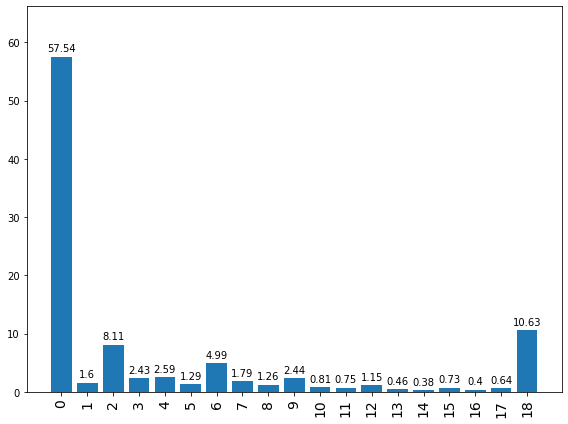

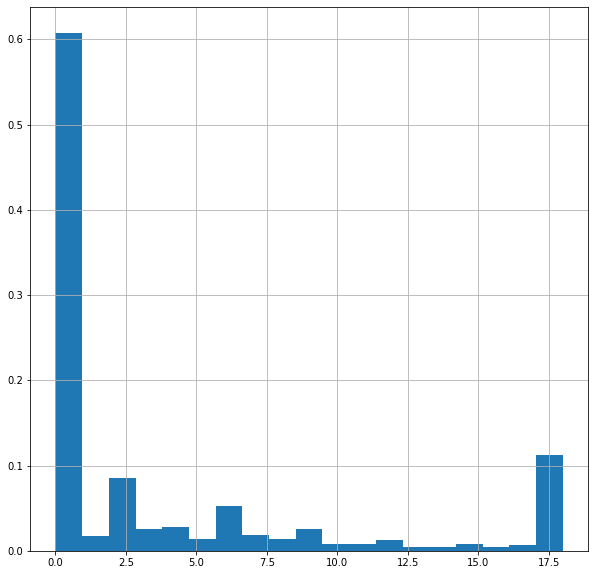

In [28]:


def distribuicao_dia_x(dia):
    distribuicao_por_dias_ate_atividade_n = df_filtrado[f"atividades_ate_dia_{dia}"].value_counts(normalize=True) * 100
    
    plot_ditribuicao_ordenada(
        df_filtrado[f"atividades_ate_dia_{dia}"], 
        distribuicao_por_dias_ate_atividade_n
    )

    df_filtrado[f"atividades_ate_dia_{dia}"].hist(bins=19, figsize=(10,10), density=True)
    plt.show()

distribuicao_dia_x(n_dias[0])

#### Plotando probabilidades de resultado vs atividades feitas

In [29]:
def determine_absolute_values(dataset_dia_n = None):
    distribuicao_por_resultado = df_filtrado["sit_matricula"].value_counts()
    result = []
    commons = [item for item in distribuicao_por_resultado.index.tolist() if item in dataset_dia_n.index.tolist()]
    
    for item in commons:
        result.append((dataset_dia_n[item] / distribuicao_por_resultado[item]) * 100)

    result = sorted(result)[::-1]
    return [ '{:.1f}%'.format(item) for item in result]


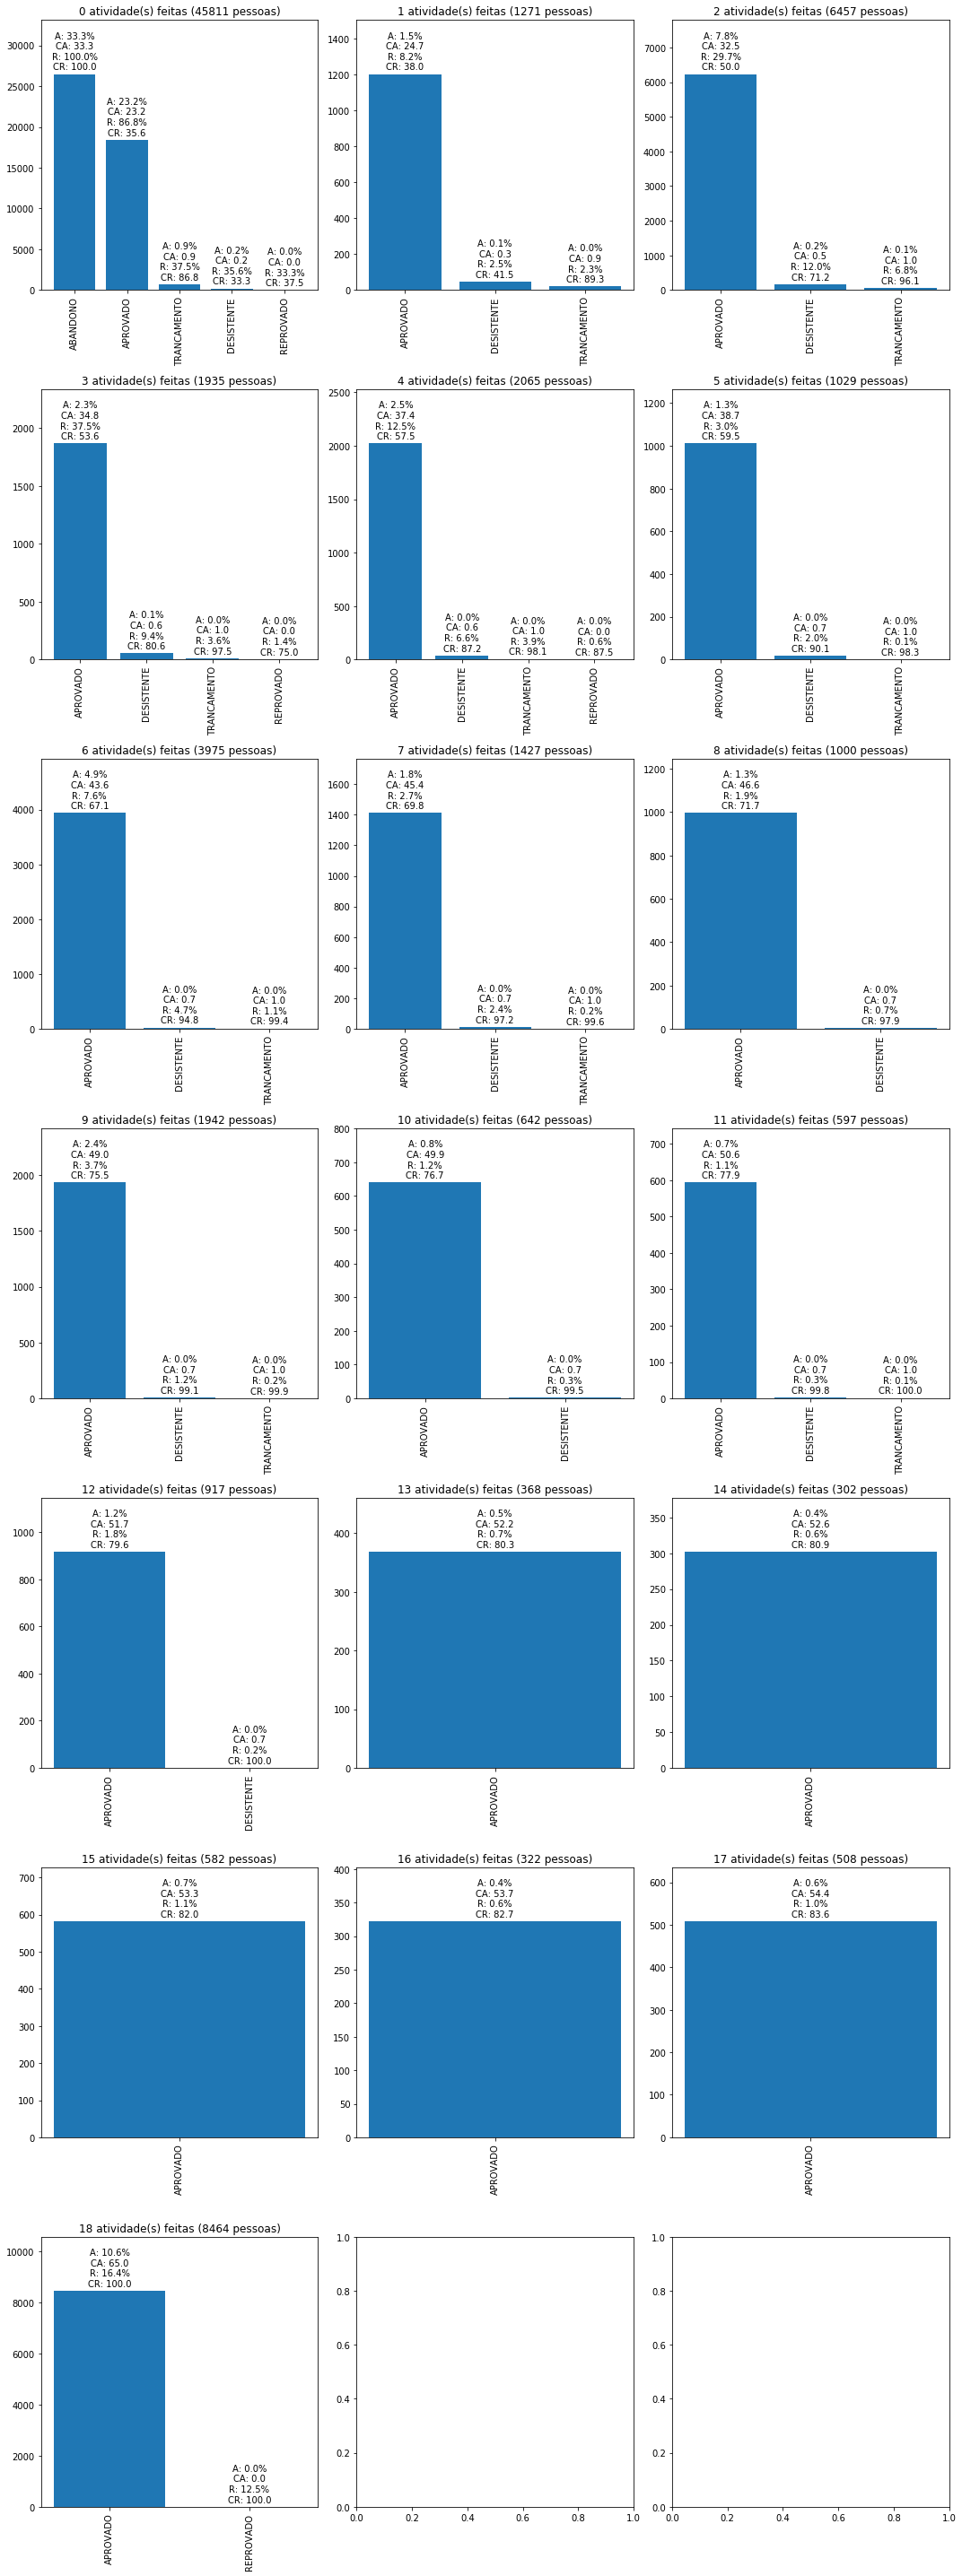

In [30]:


import numpy as np
"""
Tendo a quantidade de tarefas feitas num determinado período de tempo, podemos plotar as probabilidades 
de resultado vs o número de atividades realizadas
"""


def plot_sit_matricula_por_numero_atividades(dataset, dias = None):
    # O máximo de atividades é 18.
    fig, ax = plt.subplots(7,3,figsize=(15,40))
    ax = ax.flatten()
    total_values = dataset["sit_matricula"].value_counts()
    cumulative_values_absolute = {"ABANDONO": 0, "APROVADO": 0, "TRANCAMENTO": 0, "REPROVADO": 0, "DESISTENTE": 0}
    cumulative_values_relative = {"ABANDONO": 0, "APROVADO": 0, "TRANCAMENTO": 0, "REPROVADO": 0, "DESISTENTE": 0}
    
    for n in range(19):
        cva_list = []
        cvr_list = []
        
        resultados = dataset[dataset[f"atividades_ate_dia_{dias}"] == n]
        distribuicao_por_resultado = resultados["sit_matricula"].value_counts()
        for item in distribuicao_por_resultado.keys():
            cumulative_values_absolute[item] += (distribuicao_por_resultado[item] / sum(total_values)) * 100
            cumulative_values_relative[item] += (distribuicao_por_resultado[item] / total_values[item]) * 100
        
        commons_absolute = [item for item in distribuicao_por_resultado.index.tolist() if item in list(cumulative_values_absolute.keys())]
        commons_relative = [item for item in distribuicao_por_resultado.index.tolist() if item in list(cumulative_values_relative.keys())]
        
        cva_list = [cumulative_values_absolute[item] for item in commons_absolute ]
        cvr_list = [cumulative_values_relative[item] for item in commons_relative ]
        
        relative_values = determine_absolute_values(distribuicao_por_resultado)
        
        value = ax[n].bar(resultados["sit_matricula"].unique(), distribuicao_por_resultado)
        ax[n].set_title(f'{n} atividade(s) feitas ({resultados.shape[0]} pessoas)')
        ax[n].set_xticklabels(distribuicao_por_resultado.index.tolist(), rotation=90)
        ax[n].margins(y=0.25, x=0.05)
        
        for (index, rect) in enumerate(value):
            height = round(rect.get_height(), 2)
            ax[n].annotate('A: {:.1f}%\nCA: {:.1f}\nR: {}\nCR: {:.1f}'.format( \
                    (height/dataset.shape[0])*100, 
                    cva_list[index],
                    relative_values[index],
                    cvr_list[index]),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

plot_sit_matricula_por_numero_atividades(df_filtrado, dias = n_dias[0])

##  Kmeans

In [31]:
from sklearn.cluster import KMeans

# Inicialmente agruparemos por data e e notas de entrega
dias_atividade = df_filtrado.filter(like="dias_atividade_")
nota_aluno_ =  df_filtrado.filter(like="nota_aluno_atividade_")
nota_final_aluno_curso   = df_filtrado.filter(like="nota_final_aluno_curso")
atividades_ate_dia_n = df_filtrado.filter(like="atividades_ate_dia_")

def plot_clusters(df, query = "clusters", title="Dias por cluster",n_clusters=5):
    data_array = df.values
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(data_array)
    if query == "clusters":
        df["clusters"] = clusters
    
    df.groupby(query).aggregate("mean").plot.bar(figsize=(10,7.5))
    plt.title(title)


### Fazendo o factorize do sit_matricula

In [32]:
kmeans_df = df_filtrado[["sit_matricula",*dias_atividade.columns]]

kmeans_df_matricula = kmeans_df["sit_matricula"]


kmeans_df_enc = pd.Categorical(pd.factorize(kmeans_df_matricula)[0])

ohe_df = pd.DataFrame({"Matricula": kmeans_df_enc})
print("Categorias:", pd.factorize(kmeans_df_matricula)[1])

Categorias: Index(['APROVADO', 'ABANDONO', 'TRANCAMENTO', 'REPROVADO', 'DESISTENTE'], dtype='object')


### Plotando dias entre atividade x e mátricula (clusterizado e não clusterizado)

Categorias: Index(['APROVADO', 'ABANDONO', 'TRANCAMENTO', 'REPROVADO', 'DESISTENTE'], dtype='object')


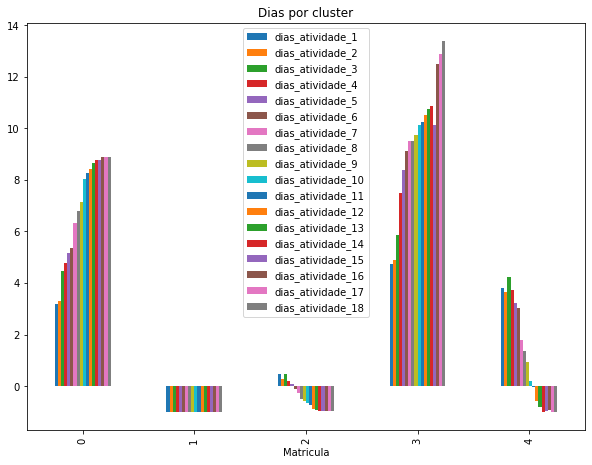

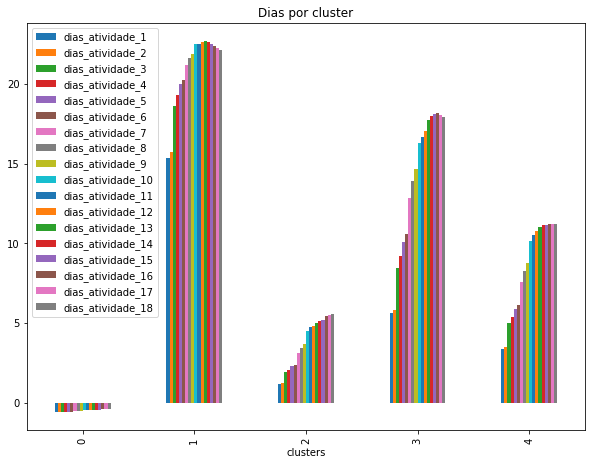

In [33]:
kmeans_df = df_filtrado[["sit_matricula",*dias_atividade.columns]]
data = pd.concat([kmeans_df, ohe_df], axis=1).drop(['sit_matricula'], axis=1)



plot_clusters(data, query="Matricula")
print("Categorias:", pd.factorize(kmeans_df_matricula)[1])
plot_clusters(data)

### Usando o método Elbow

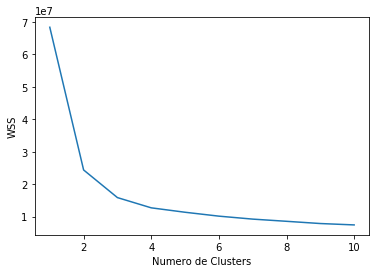

In [34]:
# Usando o método do cutuvelo para descobrir a quantidade idial de clusters
kmeans_df = df_filtrado[[*dias_atividade.columns]]

clusters_performance = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(kmeans_df)
    clusters_performance.append(kmeans.inertia_) 
    
plt.plot(range(1, 11), clusters_performance)

plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

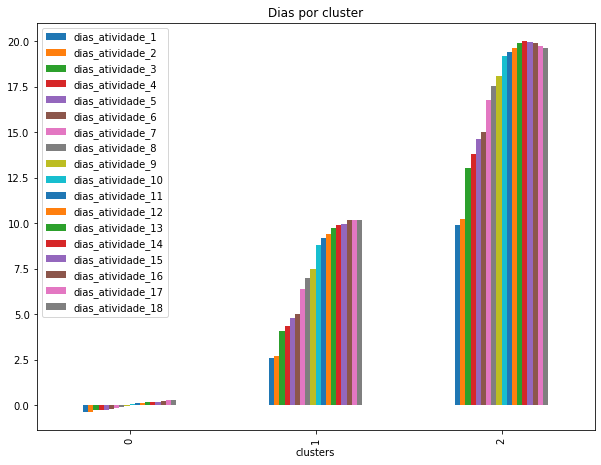

In [35]:
"""
Ou seja, verificamos que nesse cenário, o ideal são 3 clusters.
"""
plot_clusters(data, n_clusters=3)


Categorias: Index(['APROVADO', 'ABANDONO', 'TRANCAMENTO', 'REPROVADO', 'DESISTENTE'], dtype='object')


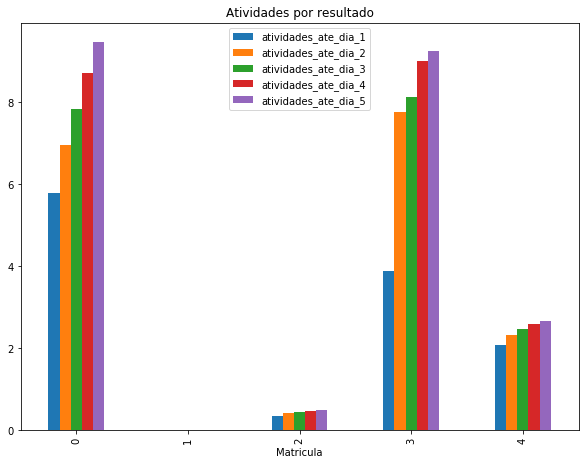

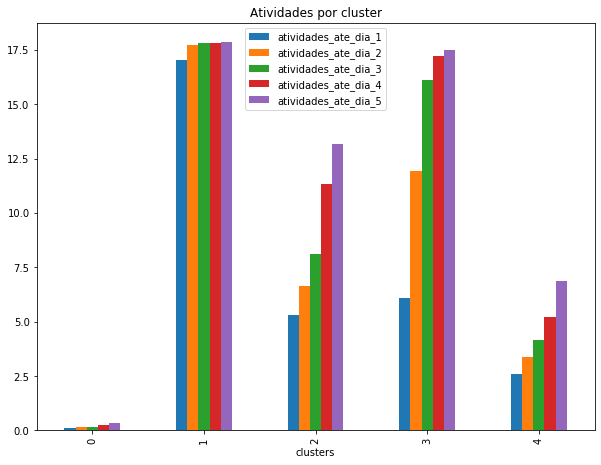

In [36]:
kmeans_df = df_filtrado[["sit_matricula",*atividades_ate_dia_n.columns]]

data = pd.concat([kmeans_df, ohe_df], axis=1).drop(['sit_matricula'], axis=1)


plot_clusters(data, query="Matricula", title="Atividades por resultado")
print("Categorias:", pd.factorize(kmeans_df_matricula)[1])
plot_clusters(data, title = "Atividades por cluster")

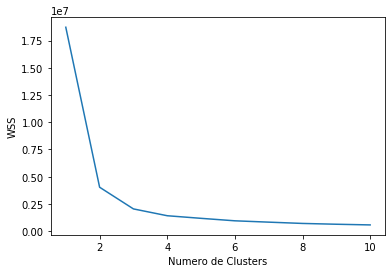

In [37]:
kmeans_df = df_filtrado[[*atividades_ate_dia_n.columns]]

clusters_performance = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(kmeans_df)
    clusters_performance.append(kmeans.inertia_) 
    
plt.plot(range(1, 11), clusters_performance)

plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

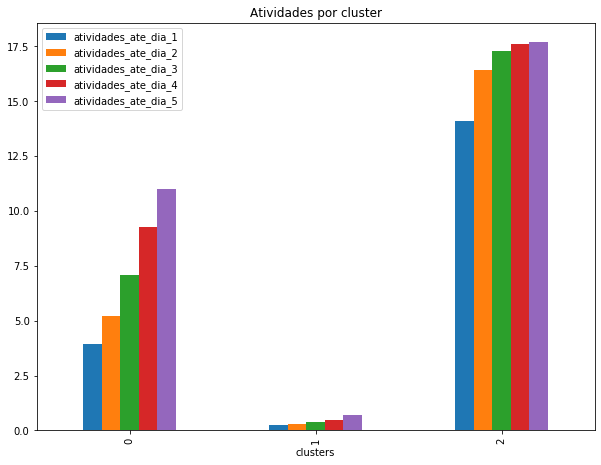

In [38]:
plot_clusters(data, n_clusters=3, title= "Atividades por cluster")

## Treinando e avaliando os dados


In [39]:
# Preparando os dados:

kmeans_df_matricula = df_filtrado["sit_matricula"]

dias_atividade = df_filtrado.filter(like="dias_atividade_")
nota_aluno_ =  df_filtrado.filter(like="nota_aluno_atividade_")
nota_final_aluno_curso   = df_filtrado.filter(like="nota_final_aluno_curso")
atividades_ate_dia_n = df_filtrado.filter(like="atividades_ate_dia_")

df_filtrado = df_filtrado[[*dias_atividade.columns, *nota_aluno_.columns, *atividades_ate_dia_n.columns, "sit_matricula"]]


kmeans_df_enc = pd.Categorical(pd.factorize(kmeans_df_matricula)[0])

ohe_df = pd.DataFrame({"resultado": kmeans_df_enc})
dados_filtrados = pd.concat([df_filtrado, ohe_df], axis=1).drop(['sit_matricula'], axis=1)


# Como os únicos possíveis dados NaN nesse cenário são as notas, podemos colocá-las como 0.
dados_filtrados = dados_filtrados.fillna(0.0)

dados_filtrados_X = dados_filtrados.drop("resultado", axis=1)
dados_filtrados_y = dados_filtrados["resultado"]


### LinearSVC

In [40]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


treino_x, teste_x, treino_y, teste_y = train_test_split(dados_filtrados_X, dados_filtrados_y, test_size=0.2)


lin_reg = LinearSVC()
lin_reg.fit(treino_x, treino_y)
previsoes = lin_reg.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


A acurácia foi 98.71%


/home/eliasb/Documentos/evasao_escolar/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [41]:
# Podemos então ver como está o modelo


print("Predictions: ", lin_reg.predict(teste_x.iloc[:5]))
print("Labels: ", list(teste_y.iloc[:5]))


Predictions:  [1 0 1 0 0]
Labels:  [1, 0, 1, 0, 0]


In [42]:
"""
Próximos passos: fazer o onehotencode no dataset inteiro
Verificar a importância de cada atributo em relação ao sit_matricula
Utilizar o standtscaler para reescalar os dados
Treinar novamente com o dataset inteiro
Ler / reler artigos sobre predição de evasão escolar.
https://minerandodados.com.br/algoritmo-k-means-python-passo-passo/
"""

'\nPróximos passos: fazer o onehotencode no dataset inteiro\nVerificar a importância de cada atributo em relação ao sit_matricula\nUtilizar o standtscaler para reescalar os dados\nTreinar novamente com o dataset inteiro\n'